```python
inclusive = false
points = [list of polygon points]
distinct_point = (x, y)

vectors = drawVectors(points)
right_line = rightVector(distinct_point)

wn = 0
for vector in vectors:
    if counterclockwise_check(vector, right_line) or collinear_check(vector, right_line) or onsegment_check(vector, right_line, inclusive):
        wn += 1

return wn % 2 == 1
```

In [154]:
from typing import List, Tuple
from pydantic import BaseModel
import matplotlib.pyplot as plt

In [155]:
class Vector(BaseModel):
    point_1: Tuple[float, float]
    point_2: Tuple[float, float]

In [156]:
points = [(0.5, 0), (0, 1.5), (1, 2.5), (2, 1.5), (1.5, 0)]
distinct_point = (1, 1)

In [157]:
def draw_vectors(points: List[Tuple[float, float]]) -> List[Vector]:
    vectors = []
    for i in range(len(points)):
        if i == len(points) - 1:
            vectors.append(Vector(point_1=points[i], point_2 = points[0]))
        else:
            vectors.append(Vector(point_1=points[i], point_2 = points[(i+1)]))

    return vectors

In [158]:
vectors = draw_vectors(points)
vectors

[Vector(point_1=(0.5, 0.0), point_2=(0.0, 1.5)),
 Vector(point_1=(0.0, 1.5), point_2=(1.0, 2.5)),
 Vector(point_1=(1.0, 2.5), point_2=(2.0, 1.5)),
 Vector(point_1=(2.0, 1.5), point_2=(1.5, 0.0)),
 Vector(point_1=(1.5, 0.0), point_2=(0.5, 0.0))]

In [159]:
right_line = Vector(point_1=distinct_point, point_2=(float('inf'), distinct_point[1]))
right_line

Vector(point_1=(1.0, 1.0), point_2=(inf, 1.0))

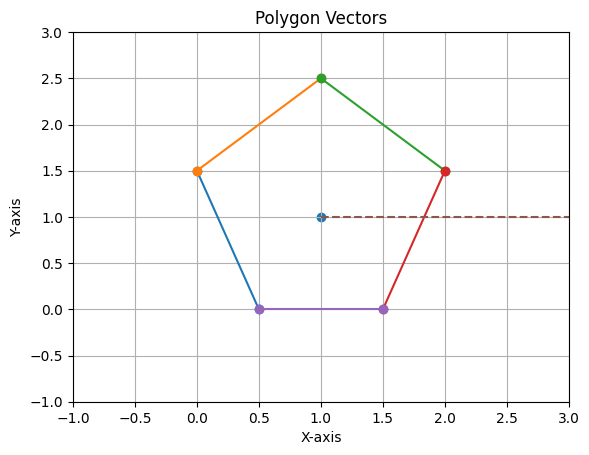

In [160]:
for vector in vectors:
    x_values = [vector.point_1[0], vector.point_2[0]]
    y_values = [vector.point_1[1], vector.point_2[1]]
    plt.plot(x_values, y_values, marker='o')

plt.scatter(distinct_point[0], distinct_point[1])
plt.plot([right_line.point_1[0], min(3, right_line.point_2[0])], [right_line.point_1[1], right_line.point_2[1]], linestyle='--')
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Polygon Vectors')
plt.grid(True)
plt.show()

In [161]:
def inside_polygon(vectors, point, inclusive=True) -> bool:
    right_line = Vector(point_1=point, point_2=(float('inf'), point[1]))

    def ccw(p1: Tuple[float, float], p2: Tuple[float, float], p3: Tuple[float, float]) -> bool:
        return (p3[1] - p1[1]) * (p2[0] - p1[0]) > (p2[1] - p1[1]) * (p3[0] - p1[0])

    def collinear(p1: Tuple[float, float], p2: Tuple[float, float], p3: Tuple[float, float]) -> bool:
        return (p3[1] - p1[1]) * (p2[0] - p1[0]) == (p2[1] - p1[1]) * (p3[0] - p1[0])

    def on_segment(p1: Tuple[float, float], p2: Tuple[float, float], p3: Tuple[float, float]) -> bool:
        return collinear(p1, p2, p3) and min(p1[0], p2[0]) <= p3[0] <= max(p1[0], p2[0]) and min(p1[1], p2[1]) <= p3[1] <= max(p1[1], p2[1])

    def intersect(v1: Vector, v2: Vector, check_edge: bool) -> bool:
        if ccw(v1.point_1, v2.point_1, v2.point_2) != ccw(v1.point_2, v2.point_1, v2.point_2) and ccw(v1.point_1, v1.point_2, v2.point_1) != ccw(v1.point_1, v1.point_2, v2.point_2):
            return True
        
        if check_edge and (on_segment(v2.point_1, v2.point_2, v1.point_1) or on_segment(v2.point_1, v2.point_2, v1.point_2)):
            return True
        
        return check_edge and (on_segment(v1.point_1, v1.point_2, v2.point_1) or on_segment(v1.point_1, v1.point_2, v2.point_2))

    return sum(intersect(vector, right_line, inclusive) for vector in vectors) % 2 == 1

In [162]:
inside_polygon(vectors, distinct_point)

True